In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Questão 1

Compare o número de iterações efetuadas pelos métodos de Newton e de Broyden para resolver o sistema
de equações não-lineares

$$
F(x, y, z) = 
\begin{bmatrix}
16x^4 + 16y^4 + z^4 - 16 \\
x^2 + y^2 + z^2 - 3 \\
x^3 − y
\end{bmatrix} = 
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}
$$

da atividade anterior com aproximação inicial $(1, 1, 1)$ para ambos os métodos e a matriz

$
B(0) = [F(2, 1, 1) − F(1, 1, 1), F(1, 2, 1) − F(1, 1, 1), F(1, 1, 2) − F(1, 1, 1)]
$
,
no método de Broyden. Comente os aspectos positivos e negativos do método de Broyden.


In [2]:
F3 = lambda x, y, z: np.array([16*x**4 + 16*y**4 + z**4 - 16,
                        x**2 + y**2 + z**2 - 3,
                        x**3 - y])

B0 = np.array([F3(2,1,1) - F3(1,1,1),
      F3(1,2,1) - F3(1,1,1),
      F3(1,1,2) - F3(1,1,1)])

In [3]:
B0

array([[240,   3,   7],
       [240,   3,  -1],
       [ 15,   3,   0]])

## Cálculo de $J(x)$

Realizando as derivadas parciais adequadas, podemos determinar a matriz Jacobiana $J(x)$.

$$J(x) =
\begin{bmatrix}
64x^3 & 64y^3 & 4z^3 \\
2x & 2y & 2z \\
3x^2 & − 1 & 0
\end{bmatrix}
$$

In [4]:
F = lambda x: np.array([16*x[0]**4 + 16*x[1]**4 + x[2]**4 - 16,
                        x[0]**2 + x[1]**2 + x[2]**2 - 3,
                        x[0]**3 - x[1]])

J = lambda x: np.array([[64*x[0]**3, 64*x[1]**3, 4*x[2]**3],
                        [2*x[0], 2*x[1], 2*x[2]],
                        [3*x[0]**2, - np.ones_like(x[1]), np.zeros_like(x[2])]])

## Método de Newton

Segue a função e evocação do Método de Newton.

In [5]:
def MetodoNewtonSNL(F,J,X0,kmax=100,tau=1.e-6, epsilon=1.e-6):
    k = 0
    Er = [tau+1]
    X = [X0]
    FX = F(X0)
    while (k <= kmax)  and  (Er[-1] > tau)  and  (np.linalg.norm(FX,np.inf) > epsilon):
        k += 1
        s = np.linalg.solve(J(X[-1]), -F(X[-1]))
        X.append(X[-1] + s)
        Er.append(np.linalg.norm(s,np.inf))
        FX = F(X[-1])
        print("Iteração (%d): ||s||_inf = %.7f" %(k, np.linalg.norm(s,np.inf)))
    return X,Er

In [6]:
X0 = np.array([1.0, 1.0, 1.0])
X_N, Er_N = MetodoNewtonSNL(F, J, X0)

Iteração (1): ||s||_inf = 0.2833333
Iteração (2): ||s||_inf = 0.0943241
Iteração (3): ||s||_inf = 0.0159812
Iteração (4): ||s||_inf = 0.0004374
Iteração (5): ||s||_inf = 0.0000003


In [7]:
X_N[-1], F(X_N[-1])

(array([0.87796576, 0.67675697, 1.33085541]),
 array([9.29389898e-12, 2.04281037e-13, 1.42219569e-13]))

O Método de Newton encontrou uma solução válida e convergiu rapidamente, com apenas cinco iterações.

## Método de Broyden

Segue a função e a invocação do Método de Broyden.

In [8]:
def MetodoBroyden(F,B,x,kmax=1000,tau=1.e-6,epsilon=1.e-6):
    x_list = [x]
    n = x.shape[0]
    k = 0
    Fx = F(x)
    Dr = [tau+1]

    while (k <= kmax)  and  (np.linalg.norm(Fx,np.inf) > epsilon)  and  (Dr[-1] > tau):
        k += 1
        s = np.linalg.solve(B,-Fx)
        x = x + s

        x_list.append(x)
        Dr.append(np.linalg.norm(s,np.inf))
        Fx = F(x)
        B = B + (1/(s.T@s))*(Fx.reshape(n,1)@s.reshape(1,n))
        print("Iteração (%d): ||s||_inf = %.7f" %(k, np.linalg.norm(s,np.inf)))
    return np.array(x_list),Dr

In [9]:
X_B, Er_B = MetodoBroyden(F, B0, X0)

Iteração (1): ||s||_inf = 2.1250000
Iteração (2): ||s||_inf = 14.5274769
Iteração (3): ||s||_inf = 14.5353315
Iteração (4): ||s||_inf = 0.0470629
Iteração (5): ||s||_inf = 0.1563210
Iteração (6): ||s||_inf = 0.0067196
Iteração (7): ||s||_inf = 0.2836295
Iteração (8): ||s||_inf = 40.8206733
Iteração (9): ||s||_inf = 40.8180370
Iteração (10): ||s||_inf = 0.0065608
Iteração (11): ||s||_inf = 0.1425390
Iteração (12): ||s||_inf = 0.0572338
Iteração (13): ||s||_inf = 0.0298264
Iteração (14): ||s||_inf = 0.0380736
Iteração (15): ||s||_inf = 0.0121471
Iteração (16): ||s||_inf = 0.0434262
Iteração (17): ||s||_inf = 0.0927517
Iteração (18): ||s||_inf = 0.0470122
Iteração (19): ||s||_inf = 0.0240503
Iteração (20): ||s||_inf = 0.0130956
Iteração (21): ||s||_inf = 0.0003801
Iteração (22): ||s||_inf = 0.0003231
Iteração (23): ||s||_inf = 0.0056186
Iteração (24): ||s||_inf = 0.0006281
Iteração (25): ||s||_inf = 0.0021838
Iteração (26): ||s||_inf = 0.0016575
Iteração (27): ||s||_inf = 0.0000774
Iteraç

In [10]:
X_B[-1], F(X_B[-1])

(array([ 0.87213538,  0.6634357 , -1.34133857]),
 array([-4.06561780e-01, -4.37931373e-05, -7.19884004e-05]))

O método obteve uma solução válida, embora menos precisa do que a obtida pelo Método de Newton. Para isso, efetuou 142 iterações, o que é um número muito superior às cinco iterações do outro método.

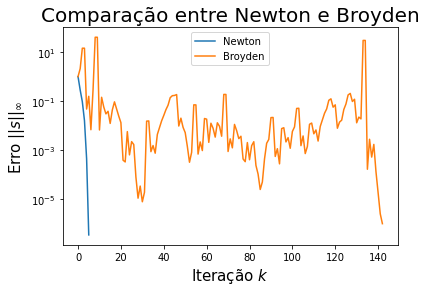

In [11]:
plt.semilogy(Er_N, label="Newton")
plt.semilogy(Er_B, label="Broyden")
plt.legend(loc="upper center")

plt.title("Comparação entre Newton e Broyden", fontdict={"size":20})
plt.xlabel("Iteração $k$", fontdict={"size":15})
plt.ylabel("Erro $||s||_\infty$", fontdict={"size":15})
plt.show()

### Aspectos Positivos e Negativos

Sabemos que o Método de Broyden realiza menos operações por iteração do que o Método de Newton, o que é um aspecto positivo.

Contudo, ele não garante a convergência quadrática como o Método de Newton, o que é uma característica negativa. No caso particular, sequer houve convergência linear. No gráfico comparativo entre os métodos, nota-se que houve certas iterações, mesmo longe do início, em que o erro aumentou. Isso resultou em um número de iterações $28.4$ ($=142/5$) vezes maior.

# Questão 2

Considere o problema de valor inicial (PVI):

$$
\begin{cases}
y' = −2ty^2 \\
y(0) = 1.
\end{cases}
$$

Estime o valor de $y(0.5)$ usando os métodos de Euler e da série de Taylor de ordem 2 com passo $h = 0.25$.

## Calculando derivadas parciais de $f(t, y)$

$y' = f(t, y) = - 2 t y^2$

$f_t(t, y) = \frac{d}{dt} [- 2 t y^2] = - 2 y^2 \frac{d}{dt}[t] = - 2 y^2$

$f_y(t, y) = \frac{d}{dy} [- 2 t y^2] = - 2 t \frac{d}{dy}[y^2] = - 2 t \times 2 y = - 4 t y$

In [12]:
f  = lambda t, y: -2 * t * y**2
ft = lambda t, y: -2 * y**2
fy = lambda t, y: -4 * t * y

## Método de Euler

Abaixo seguem a função e a invocação do Método de Euler.

De acordo com o PVI, $x_0 = 0$, $y_0 = 1$, $x_f = 0.5$ e $h = 0.25$.

In [13]:
def MetodoEuler(f,x0,xf,y0,h):
    k = 0
    x = [x0]
    y = [y0]

    while (x[-1] < xf):
        x.append(x[k] + h)
        y.append(y[k] + h*f(x[k],y[k]))
        k = k+1
        print(f"Iteração ({k}): ({x[k]}, {y[k]})")
    return x,y

In [14]:
x0 = 0
y0 = 1
xf = 0.5

h  = 0.25

In [15]:
tE, yE = MetodoEuler(f, x0, xf, y0, h)

Iteração (1): (0.25, 1.0)
Iteração (2): (0.5, 0.875)


## Método de Taylor de ordem 2

In [16]:
def MetodoTaylor2(f,fx,fy,x0,xf,y0,h):
    k = 0
    x = [x0]
    y = [y0]

    while x[-1]<xf:
        x.append(x[k]+h)
        y.append(y[k] + h*f(x[k],y[k]) + (h**2/2)*(fx(x[k],y[k]) + fy(x[k],y[k])*f(x[k],y[k])))
        k = k+1
        print(f"Iteração ({k}): ({x[k]}, {y[k]})")

    return x,y

In [17]:
tT, yT = MetodoTaylor2(f, ft, fy, x0, xf, y0, h)

Iteração (1): (0.25, 0.9375)
Iteração (2): (0.5, 0.7855796813964844)


## Resolvendo o TVI analiticamente

De $y' = - 2 t y^2$, $-\frac{dy}{y^2} = 2 t dt$.

Assim, $\frac{1}{y} = t^2 + C \iff y(t) = \frac{1}{t^2 + C}$.

Como $y(0) = 1$, $1 = \frac{1}{C} \iff C = 1$.

Logo, $y(t) = \frac{1}{t^2 + 1}$.

Portanto, $y(0.5) = \frac{1}{0.5^2 + 1} = \frac{1}{1.25}= 0.8$ 

## Comparando Métodos

Conforme esperado, o Método de Taylor de ordem $2$ obteve uma aproximação melhor, uma vez que o valor $0.79$ obtido se aproxima mais da resposta correta $0.8$ do que o número encontrado pelo Método de Euler, $0.875$